In [237]:
# import modules
import requests
from bs4 import BeautifulSoup
import re
import datetime
import nltk
from nltk.tokenize import RegexpTokenizer

#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [238]:
def get_html_from_url(url):
    try:
        r = requests.get(url)
    except requests.exceptions.RequestException as e:
        print(str(e))
        return None
    return r.text

In [239]:
html = get_html_from_url("https://www.nytimes.com/section/opinion/editorials")

In [240]:
def make_soup_from_html(html):
    soup = BeautifulSoup(html, "html5lib")
    return soup
        
    

In [241]:
soup = make_soup_from_html(html)

In [242]:
soup.title


<title>Editorials - The New York Times</title>

In [243]:
today = datetime.datetime.today().strftime('%Y/%m/%d')
print(today)

2017/11/29


In [244]:
# Use CSS selector to get the todays editorials
# We are selecting only those tags that correspond to today's date.
# Search for the a tags with href containing today's date, under tag 'latest-panel .story .story-body'  
css_selector = '#latest-panel .story .story-body a[href*="{today}"]'.format(today=today)
todays_editorials = soup.select(css_selector)
todays_editorial_urls = []
for editorial in todays_editorials:
    todays_editorial_urls.append(editorial['href']) # Get the value of href attribute

 

In [245]:
todays_editorial_urls

['https://www.nytimes.com/2017/11/29/opinion/guns-pentagon-kelley.html',
 'https://www.nytimes.com/2017/11/29/opinion/prince-harry-meghan-markle.html']

In [246]:
def get_all_editorial_text(urls):
    text = ""
    for url in urls:
        html = get_html_from_url(url)
        soup = make_soup_from_html(html)
        story = soup.find_all('p', class_="story-body-text story-content")
        for paragraph in story:
            text += paragraph.get_text()
    return text 

In [247]:
todays_editorial_text = get_all_editorial_text(todays_editorial_urls)
todays_editorial_text

'Fifty clicks of a keyboard and the pirouette of a mouse. Two minutes of a file clerk’s day. That’s possibly all it would have taken to save the lives of 26 Americans, slain in their pews, by a wife-beating child abuser who should never have had a gun.The graphic horror of American gun deaths is matched only by the bureaucratic indifference that does so little to thwart the carnage.Devin Patrick Kelley, the man who brought so much bloodshed to Sutherland Springs, Tex., the morning of Nov. 5, had hurt a child before. In 2012, he was convicted in a military court-martial of assaulting his wife and cracking his infant stepson’s skull.That conviction should have barred Mr. Kelley under federal law from purchasing firearms, but the Air Force failed to report it to the National Instant Criminal Background Check System, often known by its acronym, NICS, the screening tool for gun purchases in the United States.People convicted of felonies or domestic violence misdemeanors forfeit their right 

In [248]:
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')


In [249]:
# Create tokens
tokens = tokenizer.tokenize(text.lower())

In [250]:
tokens[:8]

['fifty', 'clicks', 'of', 'a', 'keyboard', 'and', 'the', 'pirouette']

In [251]:
# Get English stop words
nltk.download("all-corpora")
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/nitin/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /home/nitin/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package udhr to /home/nitin/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to /home/nitin/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     /home/nitin/nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data

In [252]:
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [253]:
# Remove stop words from tokens
tokens = list(filter(lambda t: t not in stop_words, tokens))

In [254]:
tokens[:8]

['fifty', 'clicks', 'keyboard', 'pirouette', 'mouse', 'two', 'minutes', 'file']

In [255]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

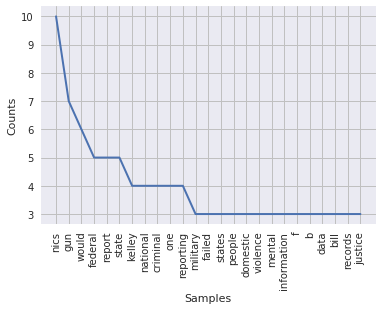

In [256]:
# Create freq dist and plot
freq_dist = nltk.FreqDist(tokens)
freq_dist.plot(25)

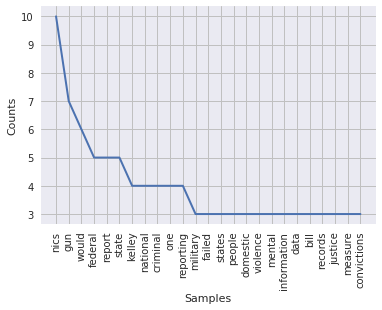

In [257]:
# Remove one letter words
tokens = list(filter(lambda t: len(t) > 1, tokens))
# Create freq dist and plot
freq_dist = nltk.FreqDist(tokens)
freq_dist.plot(25)